# What is Logistic Regression, and how does it differ from Linear Regression?
        -> Logistic Regression is a statistical model used for binary classification problems, predicting the probability of a binary outcome (e.g., yes/no, true/false). It uses a sigmoid function to map the output to a value between 0 and 1. Linear Regression, on the other hand, is used for predicting a continuous numerical value. It models the relationship between the independent and dependent variables as a straight line.

        In essence, the key difference lies in the type of problem they address and the nature of their output: Logistic Regression is for classification (predicting categories), while Linear Regression is for regression (predicting continuous values).



# Explain the role of the Sigmoid function in Logistic Regression.
        -> The Sigmoid function plays a crucial role in Logistic Regression. Its primary purpose is to map any real-valued number to a value between 0 and 1. This is essential for Logistic Regression because the model's output needs to be interpreted as a probability, and probabilities are always between 0 and 1.

        Here's how it works:

        Input: The Sigmoid function takes the linear output of the Logistic Regression model (which can be any real number) as input.
        Transformation: It applies the Sigmoid function, which has an S-shaped curve.
        Output: The output of the Sigmoid function is a value between 0 and 1, representing the probability of the input belonging to the positive class (e.g., the probability of "yes" in a yes/no classification).

# What is Regularization in Logistic Regression and why is it needed?
        -> Regularization in Logistic Regression is a technique used to prevent overfitting. Overfitting occurs when the model learns the training data too well, including the noise and outliers, leading to poor performance on unseen data.

        Regularization works by adding a penalty term to the cost function of the Logistic Regression model. This penalty discourages the model from assigning large weights to the features, effectively shrinking the weights towards zero. This helps to simplify the model and make it less sensitive to the noise in the training data.

        There are two common types of regularization in Logistic Regression:

        *   **L1 Regularization (Lasso):** Adds a penalty proportional to the absolute value of the weights. This can lead to sparse models where some weights are exactly zero, effectively performing feature selection.
        *   **L2 Regularization (Ridge):** Adds a penalty proportional to the square of the weights. This tends to shrink the weights towards zero but rarely makes them exactly zero.

        Regularization is needed in Logistic Regression to:

        *   Prevent overfitting
        *   Improve the model's generalization ability
        *   Handle multicollinearity (high correlation between features)
        *   Make the model more robust to noisy data

# What are some common evaluation metrics for classification models, and why are they important?
        ->  **Accuracy:** The proportion of correctly classified instances out of the total number of instances. While intuitive, it can be misleading for imbalanced datasets.
        *   **Precision:** The proportion of true positive predictions among all positive predictions. It measures the model's ability to avoid false positives.
        *   **Recall (Sensitivity):** The proportion of true positive predictions among all actual positive instances. It measures the model's ability to find all positive instances.
        *   **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure when there is an uneven class distribution.
        *   **AUC-ROC Curve:** The Area Under the Receiver Operating Characteristic curve. It plots the true positive rate against the false positive rate at various threshold settings. A higher AUC indicates better performance.
        *   **Confusion Matrix:** A table that summarizes the performance of a classification model on a set of test data. It shows the counts of true positives, true negatives, false positives, and false negatives.

        These metrics are important because they provide a more comprehensive understanding of a model's performance than accuracy alone. Choosing the right metric depends on the specific problem and the relative costs of false positives and false negatives. For example, in medical diagnosis, recall might be more important to minimize false negatives, while in spam detection, precision might be more important to minimize false positives.

Logistic Regression Accuracy: 1.0000


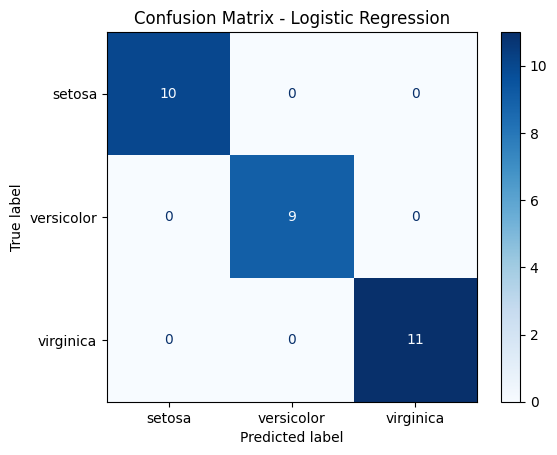

In [16]:
#  Write a Python program that loads a CSV file into a Pandas DataFrame, splits into train/test sets, trains a Logistic Regression model, and prints its accuracy. (Use Dataset from sklearn package)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

csv_file = "iris.csv"
df.to_csv(csv_file, index=False)

df = pd.read_csv(csv_file)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



Model Coefficients:
sepal length (cm): -0.3935
sepal width (cm): 0.9625
petal length (cm): -2.3751
petal width (cm): -0.9987

Logistic Regression (L2) Accuracy: 1.0000


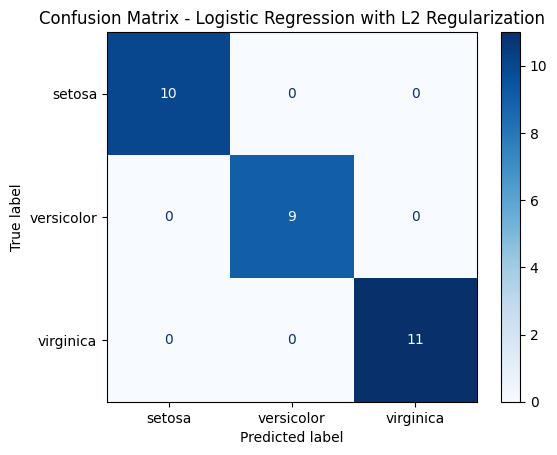

In [18]:
# Write a Python program to train a Logistic Regression model using L2 regularization (Ridge) and print the model coefficients and accuracy.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Coefficients:")
for feature, coef in zip(iris.feature_names, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"\nLogistic Regression (L2) Accuracy: {accuracy:.4f}")

disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - Logistic Regression with L2 Regularization")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



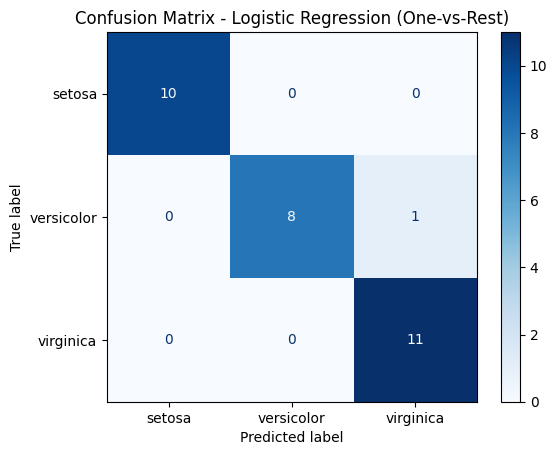

In [20]:
#  Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr' and print the classification report. (Use Dataset from sklearn package)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - Logistic Regression (One-vs-Rest)")
plt.show()


In [26]:
# Write a Python program to apply GridSearchCV to tune C and penalty hyperparameters for Logistic Regression and print the best parameters and validation accuracy.

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

model = LogisticRegression(solver='liblinear', max_iter=500)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")



Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.9583


In [28]:
# Write a Python program to standardize the features before training Logistic Regression and compare the model's accuracy with and without scaling.

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_no_scale = LogisticRegression(max_iter=500)
model_no_scale.fit(X_train, y_train)
y_pred_no_scale = model_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=500)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_no_scale:.4f}")
print(f"Accuracy with scaling:    {acc_scaled:.4f}")


Accuracy without scaling: 1.0000
Accuracy with scaling:    1.0000


Class distribution:
 target
0    0.95
1    0.05
Name: proportion, dtype: float64

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
Best Cross-Validation ROC-AUC: 0.8505

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       950
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1000
   macro avg       0.57      0.79      0.55      1000
weighted avg       0.95      0.75      0.82      1000

Test ROC-AUC: 0.8621


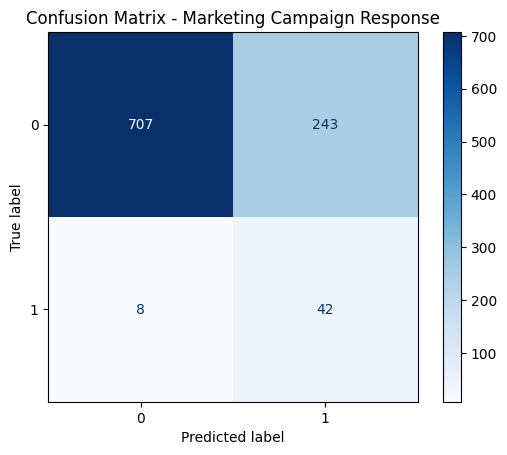

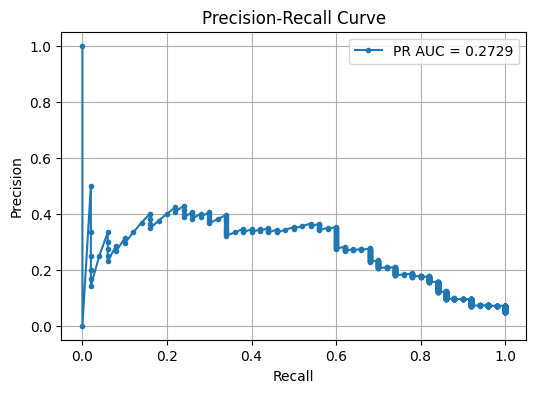

In [30]:
#  Imagine you are working at an e-commerce company that wants to predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X, y = make_classification(
    n_samples=5000, n_features=10, n_informative=6, n_redundant=2,
    n_classes=2, weights=[0.95, 0.05], flip_y=0, random_state=42
)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print("Class distribution:\n", df['target'].value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
    stratify=df['target'],
    random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation ROC-AUC: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Marketing Campaign Response")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
